Found 5216 images belonging to 2 classes.


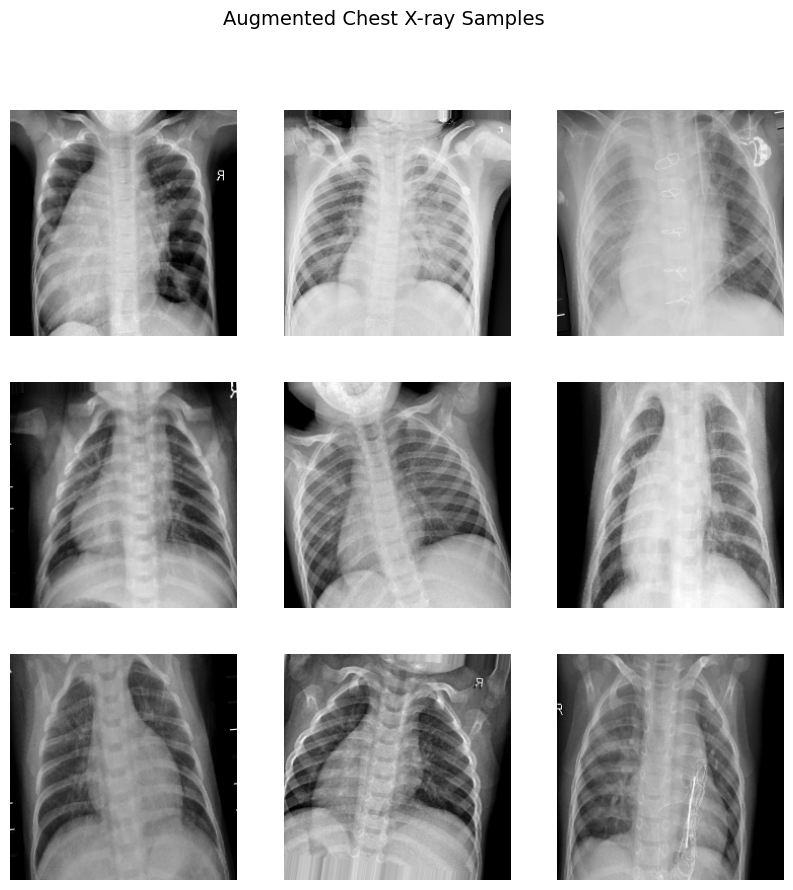

In [6]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = 224

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.1,
    horizontal_flip=True
)

generator = datagen.flow_from_directory(
    "../data/raw/chest_xray/train",
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode="grayscale",
    batch_size=1,
    class_mode="binary"
)

plt.figure(figsize=(10, 10))

for i in range(9):
    img, label = next(generator)
    plt.subplot(3, 3, i + 1)
    plt.imshow(img[0].squeeze(), cmap="gray")
    plt.axis("off")

plt.suptitle("Augmented Chest X-ray Samples", fontsize=14)
plt.show()


Found 5216 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.


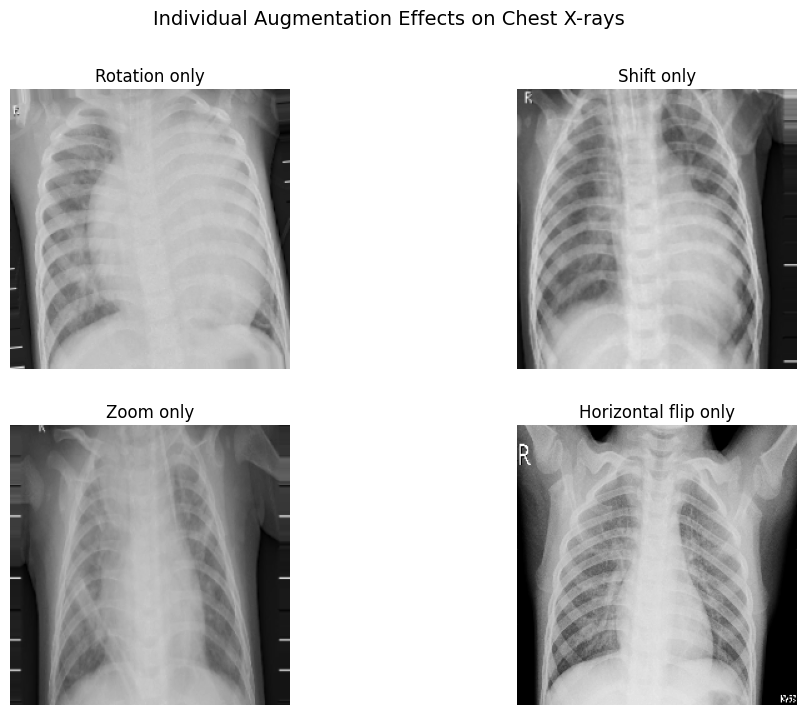

In [7]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = 224
DATA_PATH = "../data/raw/chest_xray/train"

augmentations = {
    "Rotation only": ImageDataGenerator(
        rescale=1./255,
        rotation_range=10
    ),
    "Shift only": ImageDataGenerator(
        rescale=1./255,
        width_shift_range=0.05,
        height_shift_range=0.05
    ),
    "Zoom only": ImageDataGenerator(
        rescale=1./255,
        zoom_range=0.1
    ),
    "Horizontal flip only": ImageDataGenerator(
        rescale=1./255,
        horizontal_flip=True
    ),
}

plt.figure(figsize=(12, 8))

for i, (title, gen) in enumerate(augmentations.items()):
    generator = gen.flow_from_directory(
        DATA_PATH,
        target_size=(IMG_SIZE, IMG_SIZE),
        color_mode="grayscale",
        batch_size=1,
        class_mode="binary",
        shuffle=True
    )

    img, _ = next(generator)

    plt.subplot(2, 2, i + 1)
    plt.imshow(img[0].squeeze(), cmap="gray")
    plt.title(title)
    plt.axis("off")

plt.suptitle("Individual Augmentation Effects on Chest X-rays", fontsize=14)
plt.show()
